In [ ]:
https://codlingual.tistory.com/10    
    #소스참고용 페이지

In [ ]:
# 필요한 라이브러리 불러오기 
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

# 크롤링한 결과 저장할 df 만들어놓기
df = pd.DataFrame(columns=["title", "genre", "year", "netflix"])
count = 0

# 크롤링
for num in range(1,5282):
    url = "https://www.4flix.co.kr/board/netflix/" + str(num)
    with urllib.request.urlopen(url) as url:
        try:
            doc = url.read()
            soup = BeautifulSoup(doc, "html.parser")
        
            title_year = soup.find_all("h1")[2].text.strip() # 제목(연도) 
            title = title_year[:-6] #제목만
            year = title_year[-5:-1] #연도만
            genre = soup.find_all("h3")[1].text.strip()
            netflix = soup.find_all("p")[0].text.strip()
        
            df.loc[count] = [title, genre, year, netflix]
            count+=1
        except:
            pass #3039는 글 지워짐 

In [2]:
# 필요한 라이브러리 불러오기 
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

In [3]:
# 크롤링한 결과 저장할 df 만들어놓기
df = pd.DataFrame(columns=["title", "genre", "year", "netflix"])
count = 0

In [4]:
# 크롤링
for num in range(1,5282):
    url = "https://www.4flix.co.kr/board/netflix/" + str(num)
    with urllib.request.urlopen(url) as url:
        try:
            doc = url.read()
            soup = BeautifulSoup(doc, "html.parser")
        
            title_year = soup.find_all("h1")[2].text.strip() # 제목(연도) 
            title = title_year[:-6] #제목만
            year = title_year[-5:-1] #연도만
            genre = soup.find_all("h3")[1].text.strip()
            netflix = soup.find_all("p")[0].text.strip()
        
            df.loc[count] = [title, genre, year, netflix]
            count+=1
        except:
            pass #3039는 글 지워짐 

In [5]:
df

,title,genre,year,netflix
0,아이 좀비,드라마,2017,수상: 6 wins & 20 nominations.
1,주,드라마,2017,"전 세계 동물들이 인간을 공격하기 시작하자, 논란이 많은 동물학자 잭슨 오즈는 갑작..."
2,지그와 샤코,드라마,2016,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그. 인어 마리나를 잡아먹으려 요...
3,Z 네이션,드라마,2017,"치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고, 그..."
4,겁쟁이 페달,드라마,2017,왜소한 체격에 소심한 성격. 취미는 애니메이션 감상. 누가 봐도 스포츠와 거리가 먼...
...,...,...,...,...
5227,맨 인 블랙: 인터내셔널,영화,2019,수상: 7 nominations.
5228,기묘한 이야기,드라마 NETFLIX ORIGINAL,2017,수상: Nominated for 4 Golden Globes. Another 63 ...
5229,기묘한 이야기,드라마 NETFLIX ORIGINAL,2017,수상: Nominated for 4 Golden Globes. Another 63 ...
5230,위쳐,드라마 NETFLIX ORIGINAL,2019,"세계적인 판타지 대작이 넷플릭스 시리즈로 다시 태어난다. 어둠과 위험의 세계, 진실..."


In [ ]:
df.to_csv('movie_project.csv', index=False, encoding='utf-8')

In [7]:
import pandas as pd
import numpy as np
from konlpy.tag import Kkma
m=Kkma()

In [9]:
df=pd.read_csv('movie_project.csv')

In [10]:
df.head(5)

,title,genre,year,netflix
0,아이 좀비,드라마,2017,수상: 6 wins & 20 nominations.
1,주,드라마,2017,"전 세계 동물들이 인간을 공격하기 시작하자, 논란이 많은 동물학자 잭슨 오즈는 갑작..."
2,지그와 샤코,드라마,2016,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그. 인어 마리나를 잡아먹으려 요...
3,Z 네이션,드라마,2017,"치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고, 그..."
4,겁쟁이 페달,드라마,2017,왜소한 체격에 소심한 성격. 취미는 애니메이션 감상. 누가 봐도 스포츠와 거리가 먼...


In [11]:
df.shape

(5232, 4)

In [13]:
content_new=[]
for i in range(len(df)):
    content_new.append(str(df["netflix"][i]))
content_new[:1]
df["netflix_new"]=content_new

In [14]:
import re 
# '한글'을 제외한 다른 문자 모두 제거
remove_except_ko = re.compile(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\\s|A-Za-z]")
def preprocess(text):
    text = re.sub(remove_except_ko,' ',text).strip()
    return text

df['clean_doc'] = df['netflix_new'].map(lambda x : preprocess(x))
df.head(5)

,title,genre,year,netflix,netflix_new,clean_doc
0,아이 좀비,드라마,2017,수상: 6 wins & 20 nominations.,수상: 6 wins & 20 nominations.,수상 wins nominations
1,주,드라마,2017,"전 세계 동물들이 인간을 공격하기 시작하자, 논란이 많은 동물학자 잭슨 오즈는 갑작...","전 세계 동물들이 인간을 공격하기 시작하자, 논란이 많은 동물학자 잭슨 오즈는 갑작...",전 세계 동물들이 인간을 공격하기 시작하자 논란이 많은 동물학자 잭슨 오즈는 갑작...
2,지그와 샤코,드라마,2016,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그. 인어 마리나를 잡아먹으려 요...,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그. 인어 마리나를 잡아먹으려 요...,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그 인어 마리나를 잡아먹으려 요...
3,Z 네이션,드라마,2017,"치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고, 그...","치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고, 그...",치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고 그...
4,겁쟁이 페달,드라마,2017,왜소한 체격에 소심한 성격. 취미는 애니메이션 감상. 누가 봐도 스포츠와 거리가 먼...,왜소한 체격에 소심한 성격. 취미는 애니메이션 감상. 누가 봐도 스포츠와 거리가 먼...,왜소한 체격에 소심한 성격 취미는 애니메이션 감상 누가 봐도 스포츠와 거리가 먼...


In [57]:
df["number"]=1

In [58]:
df.groupby(by="genre").sum()

,year,number
genre,,
드라마,2248316,1116
드라마 NETFLIX ORIGINAL,1711154,848
영화,5459531,2716
영화 NETFLIX ORIGINAL,1111825,552


In [15]:
from konlpy.tag import Kkma
m=Kkma()

In [34]:
stop_word = ['께서','에서','이다','에게','으로','이랑','까지','부터','하다','습니다','https','com',
            '안녕','수목','이루어지','새로이','이것','비디오','컨텐츠','배경','이용권','배경','재밌','형식','웨이브','이벤트','결합','드디어','근래','차일피일','wavve','우리','하세','oksus','끝나','코로나','모드','세포','보시','이야기','맞추','po','Name','작품','추석','빙상','준비',
             '언급','포함','많이','무료','보내','찾아오','부가','챙기','오늘','소비','진행','모든','oksusu','이미', '자기','관심','방송','서비스','통하','배우',
             '오랜만','스마트','모아','제공','챙기','시간','dtype','부가세','통하','오랜만','계시','소개','정말','아니','기웃거','따지','보리','진행하',
             '보내','이렇','안되','두고','끝나','다라','까먹','돌리'',ㅠㅠ,''남기','오랜만','안녕','유독','진행하','다음주','과의','아름','까먹','kcl','이렇',
             '진짜','쐐면','오진','그러','반하','정말','독하','금인','몸살','지나','미리','세사','abject','naver','다가오','그동안','나중','그렇','아쉽','이리',
             '여리','갈대','직무','바로','예방','보리','주사','독감','대통령','기준','돌리','요즘','얼마','미리','렌즈','갈대','아름','문제','결국','드디어','못하','하세','ㅠㅠ',
             'Length','tokens','ㅎㅎ','ㅋㅋㅋ','고르','그렇','평소','진짜','이후','다시','즐기','비교','높이','이렇','보통','object','챙기','기사','엄청','고민','vs','dtype','현재',
             '안녕','Name','알아보','바벨','바디','진행','여러분','와이','하자','그렇','어느','앳되','끝내','이런','해소','해보','직전','말하','얼마','질리','확인','울리','기다리','한지','누르',
             '빠지','궁금하','ㅠㅠ','요금','버튼','하기','경보','저번','저의','하세','크리','알아보','직전','오래되','일보','object','dtype','Name','Length','JJ','dtype','Name','squale','youtu',
             '그동안','length','Play','KIMU','object','net','그동안','ㅋㅋㅋ','status','hwanair','saintpain','andy','ndminialbum','weibo','twitter',
             'theqoo','XHhni','나의','안녕','가','요','답변','...','을','수','에','질문','제','를','이','도','좋','1','는','로','으로','2','것','은','다',',','니다','대','들','들','데','..','의',
             '때','겠','고','게','네요','한','일','할','10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ','하나','이상','20','뭐','까','있는','잘','습니다',
             '다면','했','주려','지','있','못','후','중','줄','6','과','어떤','기본','!!','단어','라고','중요한','합','가요','....','보이','네','무지','에서','너무','나','하고','안','내','만','그','인',
             '개','이다','까지','랑',',,','서','에게','말','아','해','전','이렇게','부터','이랑','라','정도','같은','보다','저','보고','또','많이','그냥','근데','했다','ㅠ','ㅠㅠ',
             '볼','했는데','때문','날','에는','입니다','두','하','그래서','본','이라','넘','된','걸','분',',,,','더','해서','엔','ㅋㅋ','분','ㅋㅋㅋ','ㅋㅋㅋㅋ','난','하지만','+','그리고',
             '난','알','번','함','ㅎ','보면','보는','있다','곳','면','화','하면','이번','같다','ㅠㅠㅠ',
             '보니','역시','그런','하게','여','라는','되는','한테', '야','합니다','있어서','건','듯','에도','ㅋㅋㅋㅋㅋ', '하면서',
             '하는데','하기','된다','이건','했던','봤는데','니','구','이고','ㅋ','!!!','참','등','시','있는데','뭔가','니까','하지','가서','기','이라고','그렇게','^^',
             '에서는','.....',',,,,','봤다','비','세','가지','나오는','있고','없어서','가는','큰','씩','애','영상','인지','몇','이라는','밖에','같아요','사','아니','감','ㅋㅋㅋㅋㅋㅋ','하다','될','분위기','되어','간',
             '특히','인가','임','어떻게','장','반','흑','물론','방','아니라','자','봐','않고','없다','무슨','조','히','플','되고','~~~',
             '어','영','에서도','(?)','따','ㅎㅎㅎ','이었다','였다','있을','있어요','ㅠㅠㅠ','상','와서','갈','해야','죠','아무','ㅜㅜ','신랑','시작','거리','사진','갈대','말차','충분히','세사','직무','날씨','오늘','하루','원래','광고','장면','독하',
             '\\','이','에','.','가','을','의','도',',', '는','를','.\\','은','들','에서', '로','한', '으로','다',
              '것','..','너무','나','(','하고','...', '내', '안','만', '!','하는','그','수','고','진짜', "'",
              '때','인','더', '거', '와','잘', '과','2', ')', '1', '까지','그리고','?','넷플릭스','!\\','할','게',
              '못', '저','랑','\n', '서','해서','정말', '중', '있는','보고','추천','날', '...\\','또','..\\','말', 
              '아','좀','해', '인데','-', '이다', '요','많이','3','그냥',"['", '근데','시간',"',",'이야기','일', '했다', 'ㅠ', 
              '전',',,','하나','넷플','생각','ㅠㅠ','부터','보다','우리','사진','볼',')\\','했는데','이렇게','이랑',
              '오늘', 'ㅋㅋㅋ','때문','개','에게','시작','에는','라', '먹고','정도','처음', '엔', '다시', '입니다','하', '두','+',
              '본', '사실',',\\','같은', '왜', '그래서','요즘', '한다', 'ㅋㅋ','이라', '된','넘',
              '걸','오','분','여기','이런','?\\','작품', '주인공','보는', '다른','님','바로','있다','곳','ㅋㅋㅋㅋ','하지만',
              '난','보면', '알','번', '지금','함','화','보기','ㅎ','면','하면','이제','엄청','없는','이번','같다','점','다음',
              '그래도','내용','보니','마지막','장면','역시','처럼','그런','하게','계속','여','라는','언니','오랜', '이나',
              '야','되는','한테','꼭','합니다', '있어서','건','듯',',,,','너','에도','위','ㅋㅋㅋㅋㅋ','하면서',
              '위해','모든', "\\'",'제일','구','하루','한번','니','둘','이고',  'ㅋ', '끝','하기','했던', '봤는데','5','아주','된다',
              '이건','하는데','조금', '없이', '별로','이라고','이라고','기','그렇게','앞','원래','성','머리','일단', '하지','편',
              '가서','이유','마다','모습','니까','속','왓챠','아직','뭔가','딱','참','있는데','부분','사용','살','나도', ',,\\',
              '많은','등','하다가','약간','길','가장', '첫','비','갑자기','!!\\','거의','에서는','기분', '세',
              '명','보면서','봤다','결국','가지', '뒤','나오는','....\\','있고','열심히','없어서', '가는', '큰','온','애','남',
              '씩','영상','인지','인지','몇','지만','이라는','사','~\\','보','아니','ㅋㅋㅋㅋㅋㅋ','완전','플','하다','될',
              '모두','되어','간','장','인가','자','특히','어떻게','임','반', '흑','물론','아니라','빨리','봐','드디어',
              '조', '않고','없다','어', '되고','히', '무슨', '얘기','!!!', 'U','했지만','동안','~~', '꽤','f','^^',',,,\\',
              '에서도','쯤','따',"['[",'ㅎㅎㅎ','있을','이었다','ㅠㅠㅠ','아무','와서','였다','있어요','갈',
              '해야','ㅜㅜ','죠','8','옆'
            ]
             
stopPos = ['JKS','JKC','JKG','JKO','JKM','JKI','JKQ','JC','JX','EPH','EPT'
           ,'EPP','EFN','EFQ','EFO','EFA','EFI','EFR','ECE','ECS','ECD','ETN','ETD','XPN','XPV',
            'XSN','XSV','XSA','XR','SF','SE','SS','SP','SO','SW','OH','ON','UN','MAC',"NNB","NNM","VXV","VV"]
def token_mecab(text):
    text = m.pos(text)
    text = [i for i in text if len(i[0])>1]
    text = [i for i in text if i[0] not in stop_word]
    text = [i[0] for i in text if i[1] not in stopPos]
    return text

In [35]:
df.head(5)

,title,genre,year,netflix,netflix_new,clean_doc,tokens
0,아이 좀비,드라마,2017,수상: 6 wins & 20 nominations.,수상: 6 wins & 20 nominations.,수상 wins nominations,수상 wins nominations
1,주,드라마,2017,"전 세계 동물들이 인간을 공격하기 시작하자, 논란이 많은 동물학자 잭슨 오즈는 갑작...","전 세계 동물들이 인간을 공격하기 시작하자, 논란이 많은 동물학자 잭슨 오즈는 갑작...",전 세계 동물들이 인간을 공격하기 시작하자 논란이 많은 동물학자 잭슨 오즈는 갑작...,세계 동물 인간 공격 논란 동물 학자 오즈 갑작스럽 변화 원인
2,지그와 샤코,드라마,2016,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그. 인어 마리나를 잡아먹으려 요...,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그. 인어 마리나를 잡아먹으려 요...,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그 인어 마리나를 잡아먹으려 요...,무인도 옴짝달싹 하이에나 지그 인어 마리나 요리조리 머리 상어 끊임없 훼방 어제 내...
3,Z 네이션,드라마,2017,"치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고, 그...","치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고, 그...",치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고 그...,치명적 좀비 바이러스 남자 백신 위험천만 미국 횡단
4,겁쟁이 페달,드라마,2017,왜소한 체격에 소심한 성격. 취미는 애니메이션 감상. 누가 봐도 스포츠와 거리가 먼...,왜소한 체격에 소심한 성격. 취미는 애니메이션 감상. 누가 봐도 스포츠와 거리가 먼...,왜소한 체격에 소심한 성격 취미는 애니메이션 감상 누가 봐도 스포츠와 거리가 먼...,체격 소심 성격 취미 애니메이션 감상 스포츠 생이 사이클 부원 통학 자전거 실력 레...


In [36]:
# 토큰화 + 토큰리스트 생성 
def make_tokens(df):
    df['tokens'] = ''
    tokens_list=[]
    for i, row in df.iterrows():
        if i%10000==0:
            print(i,'/',len(df))
        token = token_mecab(df['clean_doc'][i])
        df['tokens'][i] = ' '.join(token)
    return df

In [37]:
df = make_tokens(df)

0 / 5232


C:\Users\user\.conda\envs\media\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [38]:
df.head(3)

,title,genre,year,netflix,netflix_new,clean_doc,tokens
0,아이 좀비,드라마,2017,수상: 6 wins & 20 nominations.,수상: 6 wins & 20 nominations.,수상 wins nominations,수상 wins nominations
1,주,드라마,2017,"전 세계 동물들이 인간을 공격하기 시작하자, 논란이 많은 동물학자 잭슨 오즈는 갑작...","전 세계 동물들이 인간을 공격하기 시작하자, 논란이 많은 동물학자 잭슨 오즈는 갑작...",전 세계 동물들이 인간을 공격하기 시작하자 논란이 많은 동물학자 잭슨 오즈는 갑작...,세계 동물 인간 공격 논란 동물 학자 오즈 갑작스럽 변화 원인
2,지그와 샤코,드라마,2016,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그. 인어 마리나를 잡아먹으려 요...,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그. 인어 마리나를 잡아먹으려 요...,무인도에서 옴짝달싹 못 하고 배만 곯는 하이에나 지그 인어 마리나를 잡아먹으려 요...,무인도 옴짝달싹 하이에나 지그 인어 마리나 요리조리 상어 끊임없 훼방 어제 내일 꼬르륵


In [39]:
tokenized_doc=df["tokens"].apply(lambda x: x.split());tokenized_doc
tokenized_docs=tokenized_doc.apply(lambda x : ' '.join ([item for item in x if item not in stop_word]))

In [40]:
type(tokenized_docs)

pandas.core.series.Series

In [23]:
! pip install pyLDAvis

In [41]:
def my_tokenizer(text):
    return text.split()

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect=TfidfVectorizer(tokenizer=my_tokenizer)
tfidf=tfidf_vect.fit_transform(tokenized_docs)
# 모델선언
lda=LatentDirichletAllocation(n_components=10)
lda_output=lda.fit_transform(tfidf)

In [43]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis=pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect,mds='tsne')
pyLDAvis.display(vis)

In [44]:
from wordcloud import WordCloud

In [45]:
df["tokens"]

0                                     수상 wins nominations
1                      세계 동물 인간 공격 논란 동물 학자 오즈 갑작스럽 변화 원인
2        무인도 옴짝달싹 하이에나 지그 인어 마리나 요리조리 상어 끊임없 훼방 어제 내일 꼬르륵
3                            치명적 좀비 바이러스 남자 백신 위험천만 미국 횡단
4       체격 소심 성격 취미 애니메이션 감상 스포츠 생이 사이클 부원 통학 자전거 실력 레...
                              ...                        
5227                                       수상 nominations
5228    수상 Nominated for Golden Globes Another wins no...
5229    수상 Nominated for Golden Globes Another wins no...
5230           세계적 판타지 대작 시리즈 어둠 위험 세계 진실 어디 운명 마법사 주의 싸움
5231                 대한민국 엘리트 SKY 누구 아래 의심 어떻 화려 욕망 시기 가득
Name: tokens, Length: 5232, dtype: object

In [46]:
for i in range(len(df)):
    b=str(df['tokens'])

In [47]:
b

'0                                     수상 wins nominations\n1                      세계 동물 인간 공격 논란 동물 학자 오즈 갑작스럽 변화 원인\n2        무인도 옴짝달싹 하이에나 지그 인어 마리나 요리조리 상어 끊임없 훼방 어제 내일 꼬르륵\n3                            치명적 좀비 바이러스 남자 백신 위험천만 미국 횡단\n4       체격 소심 성격 취미 애니메이션 감상 스포츠 생이 사이클 부원 통학 자전거 실력 레...\n                              ...                        \n5227                                       수상 nominations\n5228    수상 Nominated for Golden Globes Another wins no...\n5229    수상 Nominated for Golden Globes Another wins no...\n5230           세계적 판타지 대작 시리즈 어둠 위험 세계 진실 어디 운명 마법사 주의 싸움\n5231                 대한민국 엘리트 SKY 누구 아래 의심 어떻 화려 욕망 시기 가득\nName: tokens, Length: 5232, dtype: object'

In [48]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',max_font_size=100,background_color='white').generate(b)

In [49]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

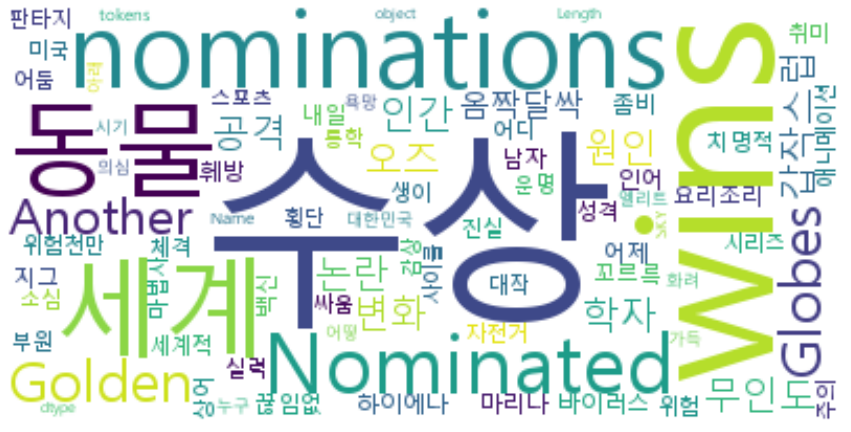

In [50]:
fig = plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')